# Best Kernel Per Distribution

For a dataset generated with a uniform distribution that is linearly seperable, what is the best kernel for an SVM for classification? A linear kernel seems like the obvious choice, however could a 2-degree or 3-degree polynomial kernel do better?

What about for data of any kind of distribution that is linearly seperable?
Is the best choice always a linear kernel, or a n-degree polynomial or even rbf kernel?

The objective of this notebook is to determine what kernel is the best of a set of kernels for various distribution functions that generate linearly seperable data.

### Block used for importing local ml package

In [10]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [11]:
# Global state variables
test_size = 5000
samples = 100
start_range = 2
end_range = 101
step = 2

## Experiment 1 - random uniform distribution

Constraints:
* All generated train and test data must be linearly seperable.
* All data points are generated on a uniform random distribution.
* Each test is sampled various times.

In [12]:
# Create EXP 1 test data
from ml import datagen
import numpy as np

start = -10 # Min x and y value to generate data points within.
end = 10    # Max x and y value to generate data points within.
margin = 1

test_data = list(map(
    np.array,
    datagen.make_uniform(test_size, start, end, start, end, margin)
))
print(test_data)

[array([[-5.68369332, -8.50160142],
       [-1.07113283,  9.30833598],
       [ 8.55904101,  1.68010261],
       ...,
       [-1.76782998, -9.89331909],
       [-5.65631535,  1.14006016],
       [-4.14913073, -8.49971251]]), array([-1,  1, -1, ..., -1,  1, -1])]


In [13]:
# Data here is guarenteed to be linearly seperable.
# Process:
# for start_range to end_range:
#     for samples:
#         generate a train set.
#         fit the kernel to the set
#         get its accuracy by fitting to test set.
#     Store range, mean, and stdev.
# Returns list containing lists of range, mean and stdev.
from sklearn.svm import SVC
import statistics

def build_exp1_results(**kwargs):
    data = []
    
    for n in range(start_range, end_range):
        sample_data = []
        for __ in range(samples):
            # Generate train data
            train_data = datagen.make_uniform(n, start, end, start, end, margin)
            while train_data[1].count(1) < 1 or train_data[1].count(-1) < 1:
                train_data = datagen.make_uniform(n, start, end, start, end, margin)
            
            # Create an SVM, fit to data, then save accuracy
            svc = SVC(**kwargs)
            svc.fit(train_data[0], train_data[1])
            results = svc.predict(test_data[0])
            total = sum(1 if x == y else 0 for x, y in zip(results, test_data[1]))
            sample_data.append(total / len(test_data[1]))
        
        average = statistics.mean(sample_data)
        stdev = statistics.stdev(sample_data)
        data.append((n, average, stdev))
        
    print('completed exp1 build')
    return data
            
    
linear_svm_data = build_exp1_results(kernel='linear')
print('completed linear svm build')
poly1_svm_data = build_exp1_results(kernel='poly', degree=1)
print('completed poly1 build')
poly2_svm_data = build_exp1_results(kernel='poly', degree=2)
print('completed poly2 build')
poly3_svm_data = build_exp1_results(kernel='poly', degree=3)
print('completed poly3 build')
rbf_svm_data = build_exp1_results(kernel='rbf')
print('completed rbf build')

completed exp1 build
completed linear svm build
completed exp1 build
completed poly1 build
completed exp1 build
completed poly2 build
completed exp1 build
completed poly3 build
completed exp1 build
completed rbf build


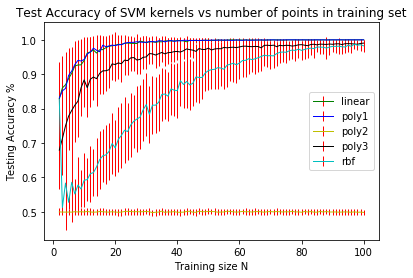

In [15]:
# Plot results for EXP 1
# I have data for various kernels.
# Data format: [[num_points_trained_on, accuracy(average), stdev]]

import matplotlib.pyplot as plt

def add_result_to_plot(result, **kwargs):
    plt.errorbar(
        [row[0] for row in result],
        [row[1] for row in result],
        [row[2] for row in result],
        **kwargs
    )

plt.figure()
plt.title('Test Accuracy of SVM kernels vs number of points in training set')
plt.xlabel('Training size N')
plt.ylabel('Testing Accuracy %')
add_result_to_plot(linear_svm_data, color='g', ecolor='r', label='linear', lw=1)
add_result_to_plot(poly1_svm_data, color='b', ecolor='r', label='poly1', lw=1)
add_result_to_plot(poly2_svm_data, color='y', ecolor='r', label='poly2', lw=1)
add_result_to_plot(poly3_svm_data, color='k', ecolor='r', label='poly3', lw=1)
add_result_to_plot(rbf_svm_data, color='c', ecolor='r', label='rbf', lw=1)

handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles, labels)

plt.show()



Experiment 2 - Isotropic Gaussian blobs
Constraints:
* All generated train and test data is linearly seperable.
* All data points are generated using sklearn's make_blob generator.

In [16]:
# Create EXP 2 test data
from sklearn import datasets

test_data = datasets.make_blobs(test_size, 2, 2)
print(test_data)

(array([[ 10.51342569, -10.1314913 ],
       [  7.44177776,  -9.49805857],
       [ -4.40485366,   7.84745173],
       ...,
       [  6.83605442,  -9.08266624],
       [ -5.19027049,   5.19125214],
       [ -5.54451452,   6.35374766]]), array([1, 1, 0, ..., 1, 0, 0]))


In [ ]:
# Code for exp2
# Data here is guarenteed to be linearly seperable.
# Process:
# for start_range to end_range:
#     for samples:
#         generate a train set.
#         fit the kernel to the set
#         get its accuracy by fitting to test set.
#     Store range, mean, and stdev.
# Returns list containing lists of range, mean and stdev.
from sklearn.svm import SVC
from sklearn import datasets
import statistics

def build_exp2_results(**kwargs):
    data = []
    
    for n in range(start_range, end_range, step):
        sample_data = []
        for __ in range(samples):
            # Generate train data
            train_data = datasets.make_blobs(n, 2, 2)
            
            # Create an SVM, fit to data, then save accuracy
            svc = SVC(**kwargs)
            svc.fit(train_data[0], train_data[1])
            results = svc.predict(test_data[0])
            total = sum(1 if x == y else 0 for x, y in zip(results, test_data[1]))
            sample_data.append(total / len(test_data[1]))
        
        average = statistics.mean(sample_data)
        stdev = statistics.stdev(sample_data)
        data.append((n, average, stdev))
        
    return data
            
    
linear_svm_data = build_exp2_results(kernel='linear')
print('completed linear svm build')
poly1_svm_data = build_exp2_results(kernel='poly', degree=1)
print('completed poly1 build')
poly2_svm_data = build_exp2_results(kernel='poly', degree=2)
print('completed poly2 build')
poly3_svm_data = build_exp2_results(kernel='poly', degree=3)
print('completed poly3 build')
rbf_svm_data = build_exp2_results(kernel='rbf')
print('completed rbf build')

completed linear svm build


In [ ]:
# Plot results for EXP 2
# I have data for various kernels.
# Data format: [[num_points_trained_on, accuracy(average), stdev]]

import matplotlib.pyplot as plt

def add_result_to_plot(result, **kwargs):
    plt.errorbar(
        [row[0] for row in result],
        [row[1] for row in result],
        [row[2] for row in result],
        **kwargs
    )

plt.figure()
plt.title('Test Accuracy of SVM kernels vs number of points in training set for gaussian blob dist')
plt.xlabel('Training size N')
plt.ylabel('Testing Accuracy %')
add_result_to_plot(linear_svm_data, color='g', ecolor='r', label='linear', lw=1)
add_result_to_plot(poly1_svm_data, color='b', ecolor='r', label='poly1', lw=1)
add_result_to_plot(poly2_svm_data, color='y', ecolor='r', label='poly2', lw=1)
add_result_to_plot(poly3_svm_data, color='k', ecolor='r', label='poly3', lw=1)
add_result_to_plot(rbf_svm_data, color='c', ecolor='r', label='rbf', lw=1)

handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles, labels)

plt.show()

